In [1]:
#Program 2:
#Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embeddings for Q 1. Select 10 words from a specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships. Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words for a given input.

Loading pre-trained word vectors...

Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777


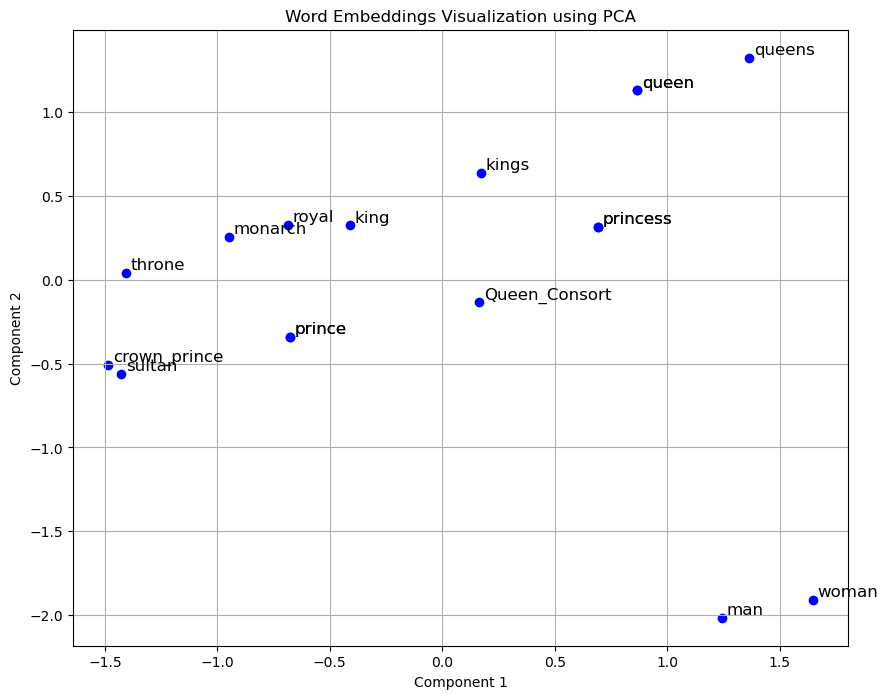

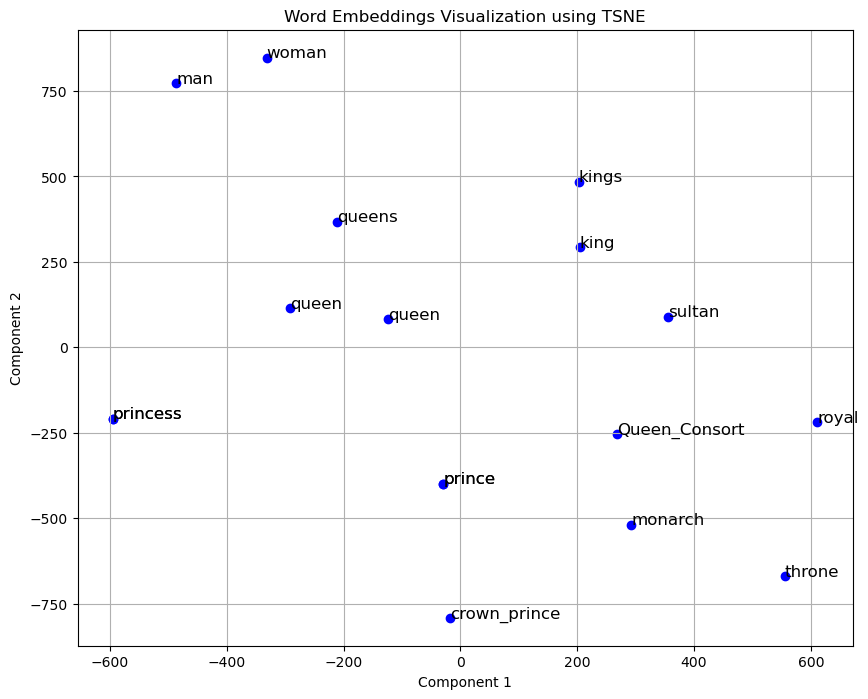

In [2]:
# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Word2Vec model
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")

# Function to perform vector arithmetic and find similar words
def explore_word_relationships(word1, word2, word3):
    try:
        result_vector = word_vectors[word1] - word_vectors[word2] + word_vectors[word3]
        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)
        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]
        
        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:5]:
            print(f"{word}: {similarity:.4f}")
        return filtered_words
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")
        return []

# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_vectors = reducer.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# Example words
words_to_explore = ["king", "man", "woman", "queen", "prince", "princess", "royal", "throne"]
filtered_words = explore_word_relationships("king", "man", "woman")

# Combine all words to visualize
words_to_visualize = words_to_explore + [word for word, _ in filtered_words]

# Get the corresponding vectors
vectors_to_visualize = np.array([word_vectors[word] for word in words_to_visualize])

# Visualize using PCA
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='pca')

# Visualize using t-SNE
visualize_word_embeddings(words_to_visualize, vectors_to_visualize, method='tsne')


(b) Select 10 words from a specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships. Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words for a given input.

Loading pre-trained word vectors...


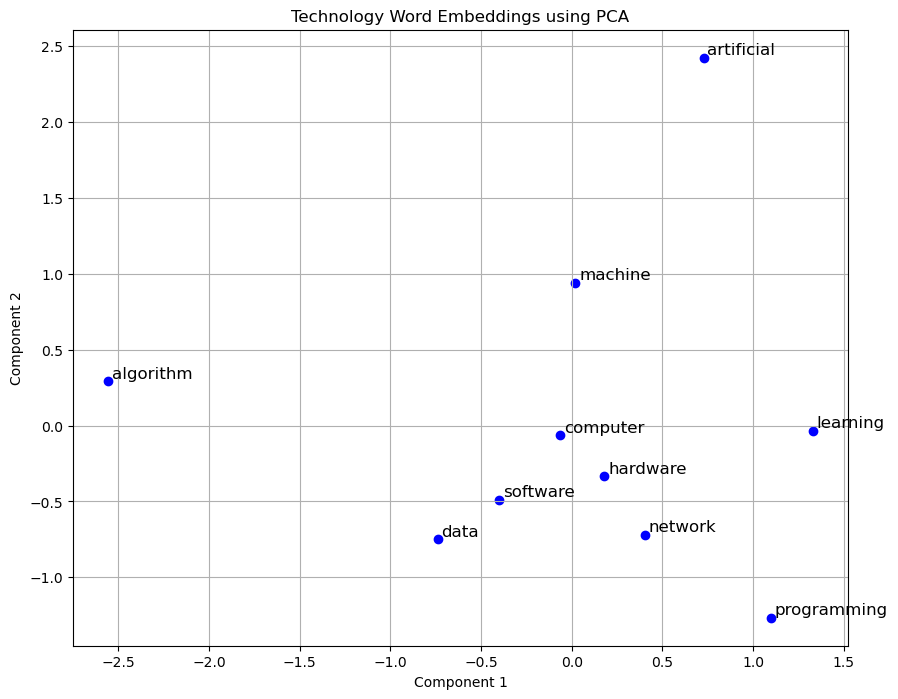

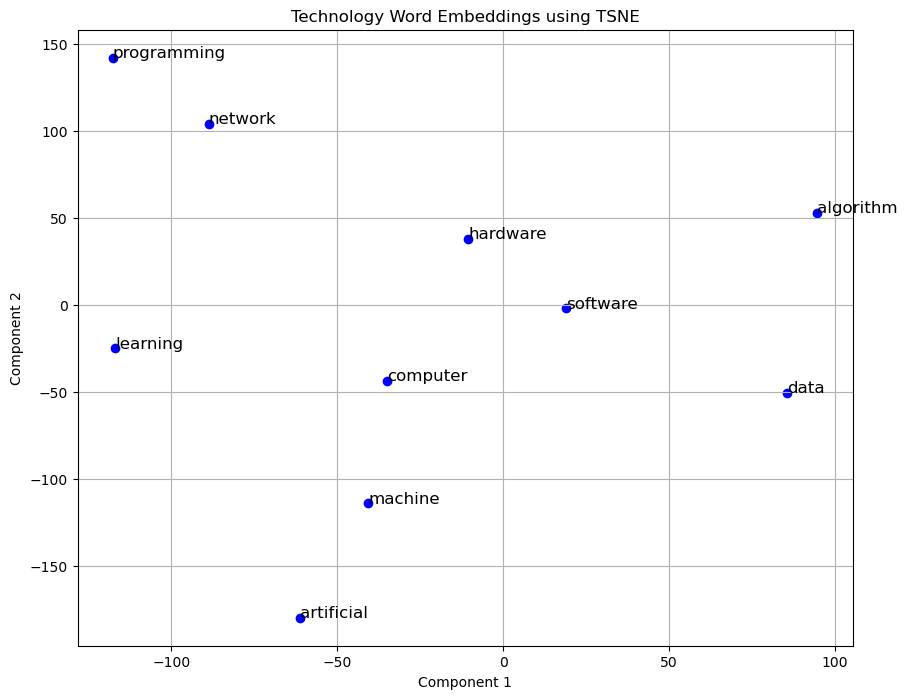


Top 5 semantically similar words to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Top 5 semantically similar words to 'learning':
teaching: 0.6602
learn: 0.6365
Learning: 0.6208
reteaching: 0.5810
learner_centered: 0.5739

Top 5 semantically similar words to 'software':
sofware: 0.7120
Software: 0.7104
copyrightable_Taney: 0.6358
softwares: 0.6314
CodeArmor: 0.6290


In [3]:
# Import necessary libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load pre-trained Word2Vec vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")

# Select 10 words from the 'technology' domain
domain_words = ["computer", "software", "hardware", "algorithm", "data", 
                "network", "programming", "machine", "learning", "artificial"]

# Get their corresponding vectors
domain_vectors = np.array([word_vectors[word] for word in domain_words])

# Function to visualize embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca', perplexity=5):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_vectors = reducer.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
    plt.title(f"Technology Word Embeddings using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# Visualize using PCA
visualize_word_embeddings(domain_words, domain_vectors, method='pca')

# Visualize using t-SNE
visualize_word_embeddings(domain_words, domain_vectors, method='tsne', perplexity=3)

# Function to generate 5 semantically similar words for a given input
def generate_similar_words(word):
    try:
        similar_words = word_vectors.most_similar(word, topn=5)
        print(f"\nTop 5 semantically similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")

# Examples: Generate similar words
generate_similar_words("computer")
generate_similar_words("learning")
generate_similar_words("software")
